In [2]:
#Installing libraries

import pandas as pd
!pip install datasets
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Loading data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: C:\Users\zyesn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
#Filter for US data analyst roles
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

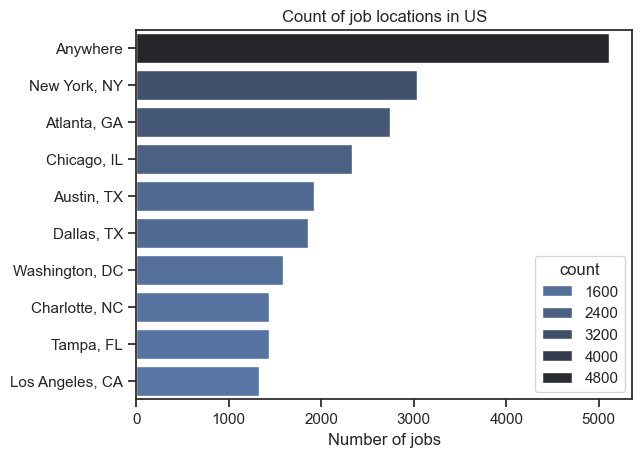

In [ ]:
#Plotting job location count per US states based on the filtered dataframe above
df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'dark:b_r')
plt.title('Count of job locations in US')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

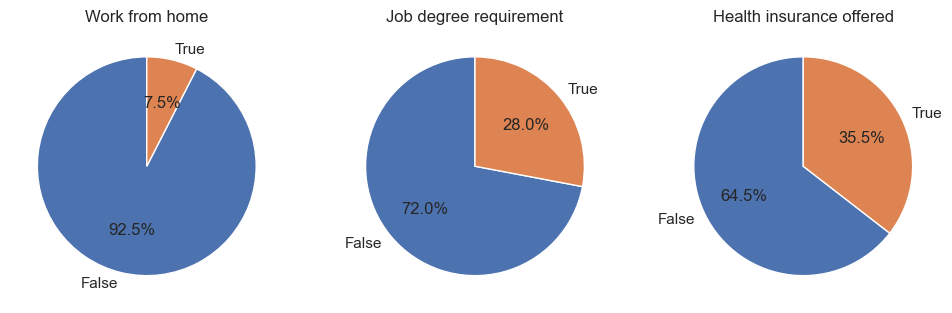

In [ ]:
#Plotting a share of jobs allowing working frome home, requiring a job degree, or whether the insurance is being offered or not.
dict_columns = {
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Job degree requirement',
    'job_health_insurance': 'Health insurance offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12,5)

for index, (column, title) in enumerate(dict_columns.items()):
    ax[index].pie(df_da_us[column].value_counts(), startangle = 90, autopct = '%1.1f%%', labels = ['False','True'])
    ax[index].set_title(title)

plt.show()

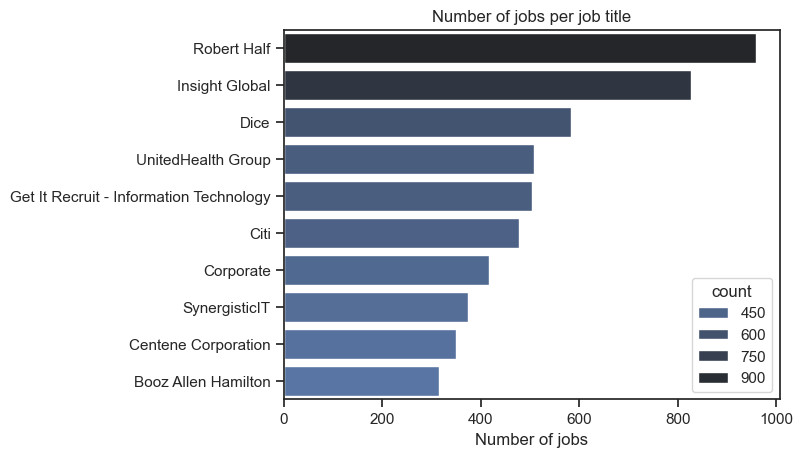

In [ ]:
#Plotting count of jobs per company in US
df_plot = df_da_us['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r')
plt.title('Count of companies for data analyst roles in US')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()